# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer
* CreditScore: It defines the credit history of the customer.
* Geography: A customer’s location
* Gender: It defines the Gender of the customer
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

#***Steps or Approach to Study***

##Step 1: Importing the Libraries

To begin with, we need to import the necessary libraries and dependencies that we will be using throughout the project. These include pandas, NumPy, matplotlib, seaborn, scikit-learn, and TensorFlow

##Step 2: Data Analysis & Visualization

Next, we need to analyze and visualize the dataset to gain insights into the dataset and understand the variables that may contribute to customer churn.

##Step 3: Apply One Hot Encoding Technique on Gender & Geography Column

Since our dataset contains categorical variables like “Gender” and “Geography,” we need to convert them into numerical format for the ANN model to process. We apply the one-hot encoding technique to transform these categorical columns into binary columns, representing different categories

##Step 4: Handle the Imbalanced Target Column and Balance It

Customer churn datasets often suffer from class imbalance, where the number of churners is significantly smaller than non-churners. To address this issue, we will balance the target column by upsampling the minority class. This ensures that the model does not get biased towards the majority class during training

##Step 5: Splitting the Dataset into Training and Testing Sets

Before training our ANN model, we need to preprocess the data by separating the features and the target variable. we split the dataset into training and testing sets. The training set is used to train the model on historical data, while the testing set is used to evaluate the model’s performance on unseen data. Typically, around 70–80% of the data is used for training, and the remaining 20–30% is used for testing

##Step 6: Feature Scaling - Sklearn Standard Scaler Technique

Feature scaling is an essential preprocessing step for ANN models. It standardizes the range of input features, ensuring that they have similar scales. This step prevents certain features from dominating others during the training process. We apply feature scaling using techniques such as Sklearn Standard Scaler Technique for Standardized the Input Features Values.

##Step 7: Build the Artificial Neural Network (ANN) Model

In this Step, Now it’s time to construct the architecture of the ANN model using the Keras library, which is a high-level API for building neural networks in TensorFlow. The model consists of multiple layers of interconnected neurons, including input, hidden, and output layers. We define the number of neurons in each layer, activation functions, and other parameters. The choice of the model architecture depends on the complexity of the problem and the available computational resources.

##Step 8: Training the ANN Model

Once the model architecture is defined, we train the ANN model using the training dataset. During training, the model adjusts its internal parameters (weights and biases) to minimize the difference between the predicted churn outcomes and the actual outcomes. We specify the number of epochs (iterations) and the batch size for training. Monitoring metrics such as accuracy, loss, and validation metrics help assess the model’s performance during training.


##Step 9: Visualize the Loss & Accuracy of ANN Model

Finally, we can visualize the model’s performance by plotting the training and validation accuracy and loss over the epochs

##Step 10: Evaluating the ANN Model & Predicting Churn for New Customers

After training, we evaluate the performance of the ANN model using the testing dataset. We calculate various evaluation metrics such as accuracy, precision, recall, and F1 score to assess how well the model predicts customer churn.

##Step 11: Predict the Churn and generate prediction score

Utilize the trained ANN model to predict churn for new customers by inputting their characteristics and behaviors into the model. The model generates a churn prediction score or probability, indicating the likelihood of the customer churning. Businesses can then take appropriate actions, such as targeted retention campaigns or personalized offers, to mitigate churn risk for these customers.

##Step 12: Find the importance Feature of the Model

Use SHAP to look for the important feature in the model to be able to offer appropriate, business profesional insight.

## Step 1 - Importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# To get different metric scores, and split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# To get different tensorflow data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, ReLU


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
#checking tensorflow version
print(tf.__version__)

2.19.0


## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the data into my colab notebook
data = pd.read_csv('/content/drive/My Drive/UTA - AIML/Deep Learning project/Churn.csv')

##Step 2: Data Analysis & Visualization

## Data Overview

In [5]:
# checking the headings of the data
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Observation:

1.   The dataframe contains 14 columns

2.   Each columns contains information about customers showing their geographical locations, gender, ages, estimated salaries among others.

In [6]:
# checking the structure of the data
data.shape

(10000, 14)

Observation:

1.   The dataframe has 14 columns and 10,000 rows

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observation:
1.   The dataset have 14 columns and 10,000 observations in it
2.   There are no columns that have missing values

In [8]:
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

Observations:

1.  Age has a large range of values i.e. 18 to 92.

2. Credit Score is between 350 to 850

3. Estimated Salary highest amount is USD199,992.48cents

4. More indept analysis is required.

In [9]:
#checking if there is any duplication in the dataset
data.duplicated().sum()

np.int64(0)

Observation:

1.  There are no duplicated value in the dataset

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observation:

1. There are no null values in the dataset

In [11]:
# Showing the unique values of each columns
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Observation:

1.   Customer Age has 70 unique values, balance 6382, credit score 460, tenure 11 e.t.c.
2.   Only 1 of the columns is categotical items we would consider
3.   There are 4 columns that contains binary category values in the dataset

In [12]:
# drop the irrelevant columns
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [13]:
#checking the data after dropping irrelevant columns
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

Observation:

1.  3 columns have been dropped - ***Row number , Customer Id, Surname***


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 80)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 7))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target variable=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target variable=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Geography

In [16]:
# check the value counts of "Geography" column.
data_geography = data['Geography'].value_counts()
data_geography

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

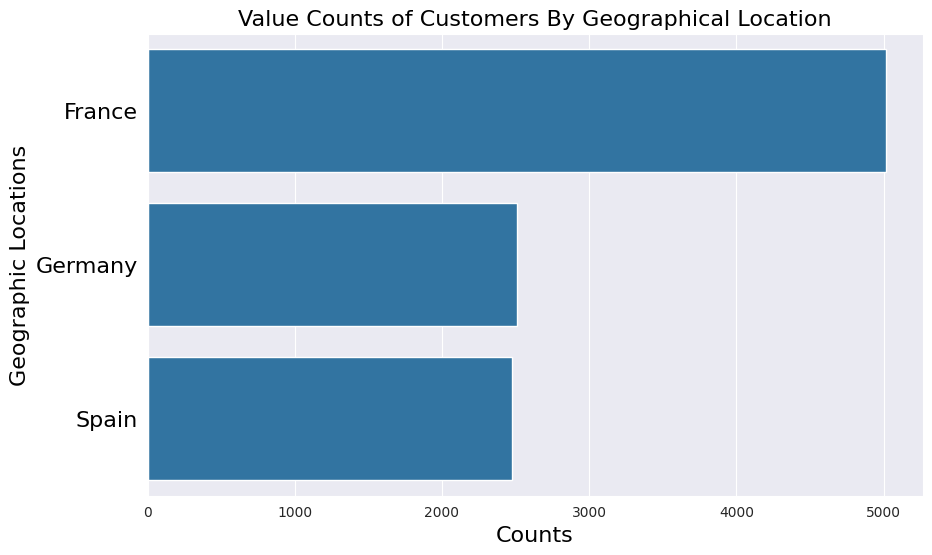

In [17]:
# let's perform univarient eda on "Geography" column.
plt.figure(figsize=(10,6))
res=sns.barplot(x=data_geography, y=data_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.title('Value Counts of Customers By Geographical Location',fontsize = 16, color='black')
plt.ylabel('Geographic Locations',fontsize = 16, color='black')
plt.xlabel('Counts', fontsize =16, color= 'black')
plt.show()

Observation:

1. Most of the Customers are from France, half of the customers are from this country which is 5,014
2. The remaining customers are from Germany and Spain, 2,509 and 2,477 respectively

###Gender

In [18]:
# check the value counts of "Gender" column.
data_gender = data['Gender'].value_counts()
data_gender

Gender
Male      5457
Female    4543
Name: count, dtype: int64

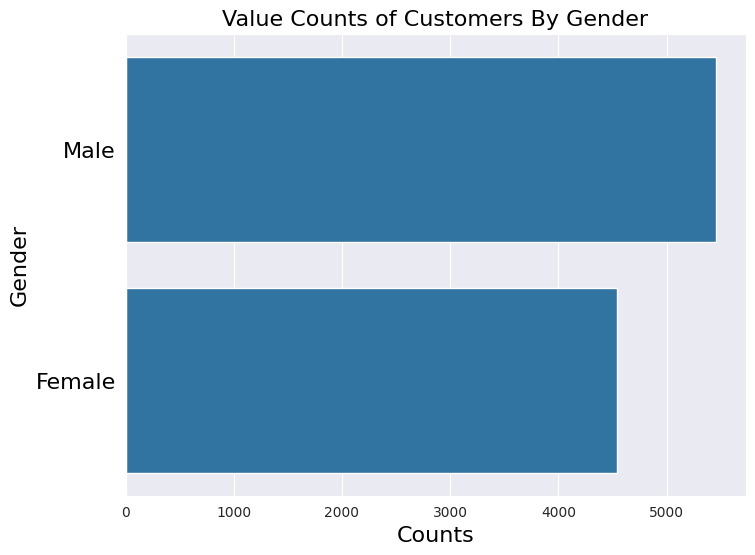

In [19]:
# let's perform univarient eda on "Gender" column.
plt.figure(figsize=(8,6))
res=sns.barplot(x=data_gender, y=data_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.title('Value Counts of Customers By Gender',fontsize = 16, color='black')
plt.ylabel('Gender',fontsize = 16, color='black')
plt.xlabel('Counts', fontsize =16, color= 'black')
plt.show()

Observation:

1. The distribution between the gender is close. Male customers are more, but not much different though.
2. Male is 5,457 and Female is 4,543
3. It is very interesting that there are more male customers

###Number of Products

In [20]:
# check the value counts of "number of products" column.
data_nop = data['NumOfProducts'].value_counts()
data_nop

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

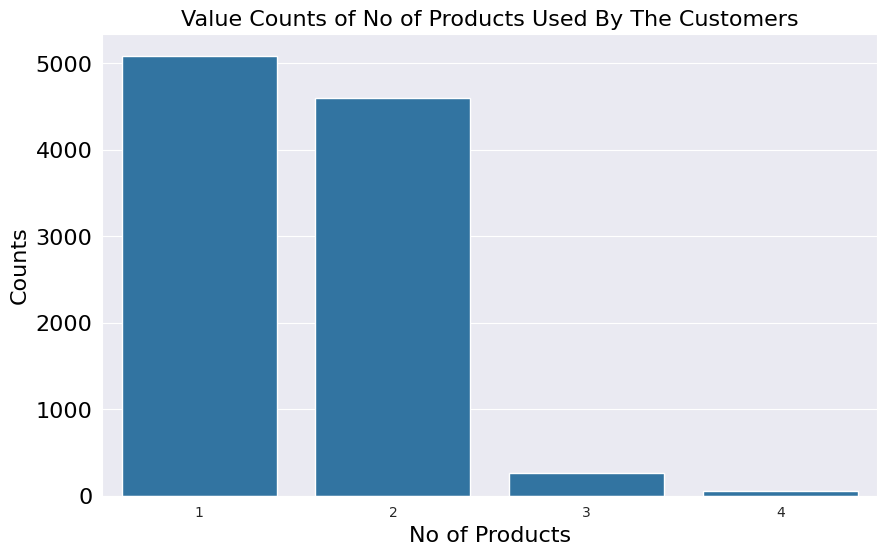

In [21]:
# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(10,6))
plt.title('Value Counts of No of Products Used By The Customers',fontsize = 16, color='black')
plt.ylabel('Counts',fontsize = 16, color='black')
plt.xlabel('No of Products', fontsize =16, color= 'black')
res=sns.barplot(y=data_nop, x=data_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.show();

Observation:

1. There are 4 number of products subscribed to by the customers
2. 5,084 customers have subscribed to product 1
3. 4,590 customers subscribed to product 2
4. 326 customers subcribed to products 3 and 4

###Has Credit Card

In [22]:
# check the value counts of "HasCrCard" column.
data_crc = data['HasCrCard'].value_counts()
data_crc

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

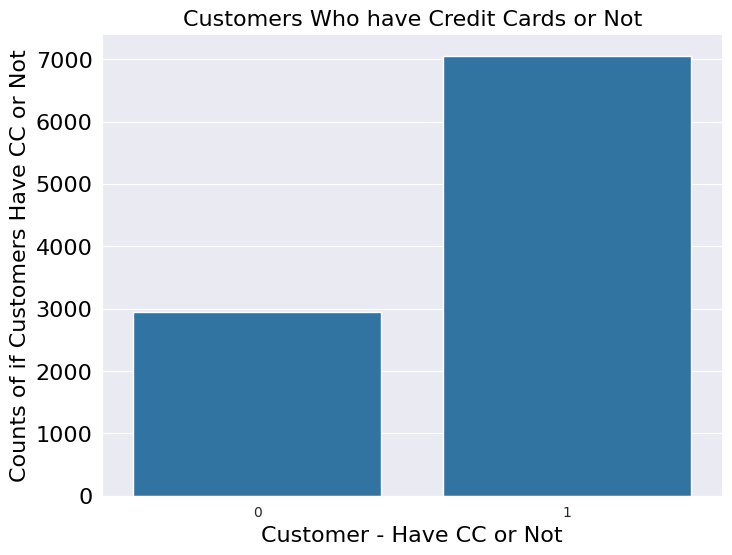

In [23]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(8,6))
res=sns.barplot(y=data_crc, x=data_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Counts of if Customers Have CC or Not',fontsize = 16, color='black')
plt.xlabel('Customer - Have CC or Not',fontsize = 16, color='black')
plt.title('Customers Who have Credit Cards or Not',fontsize = 16, color='black')
plt.show()

Observation:

1.  More customers has credit cards - 7,055
2.  While 29.45% of the customers did not have credit cards

###Active or Not Active Customers

In [24]:
# check the value counts of "IsActiveMember" column.
data_iam = data['IsActiveMember'].value_counts()
data_iam

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

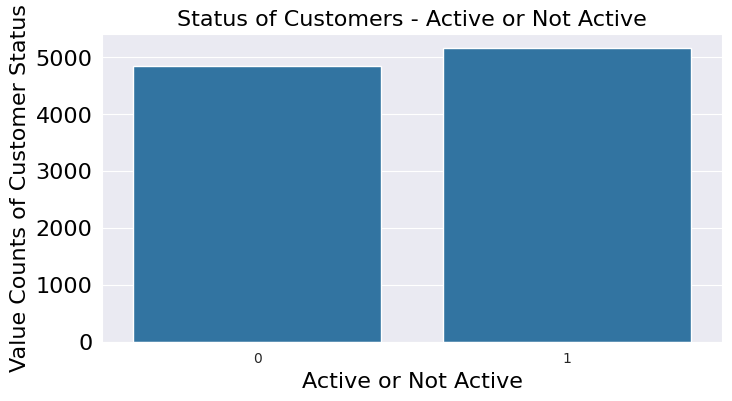

In [25]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(8,4))
res=sns.barplot(y=data_iam, x=data_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Status',fontsize = 16, color='black')
plt.xlabel('Active or Not Active',fontsize = 16, color='black')
plt.title('Status of Customers - Active or Not Active',fontsize = 16, color='black')
plt.show()

Observation:

1. 52% of the customers maintained active accounts with the bank while 48% had inactive accounts

###Churned/Not Churned

In [26]:
# check the value counts of "Exited" target column.
data_exit = data['Exited'].value_counts()
data_exit

Exited
0    7963
1    2037
Name: count, dtype: int64

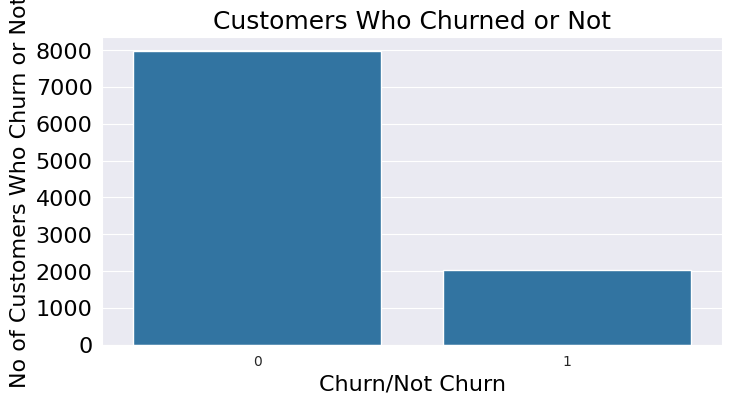

In [27]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(8,4))
res=sns.barplot(y=data_exit, x=data_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('No of Customers Who Churn or Not',fontsize = 16, color='black')
plt.xlabel('Churn/Not Churn',fontsize = 16, color='black')
plt.title('Customers Who Churned or Not',fontsize = 18, color='black')
plt.show()

Observation:

1. 80% of the customers churned the bank.
2. This is the area our neural network is goinf to focus on.

###Age

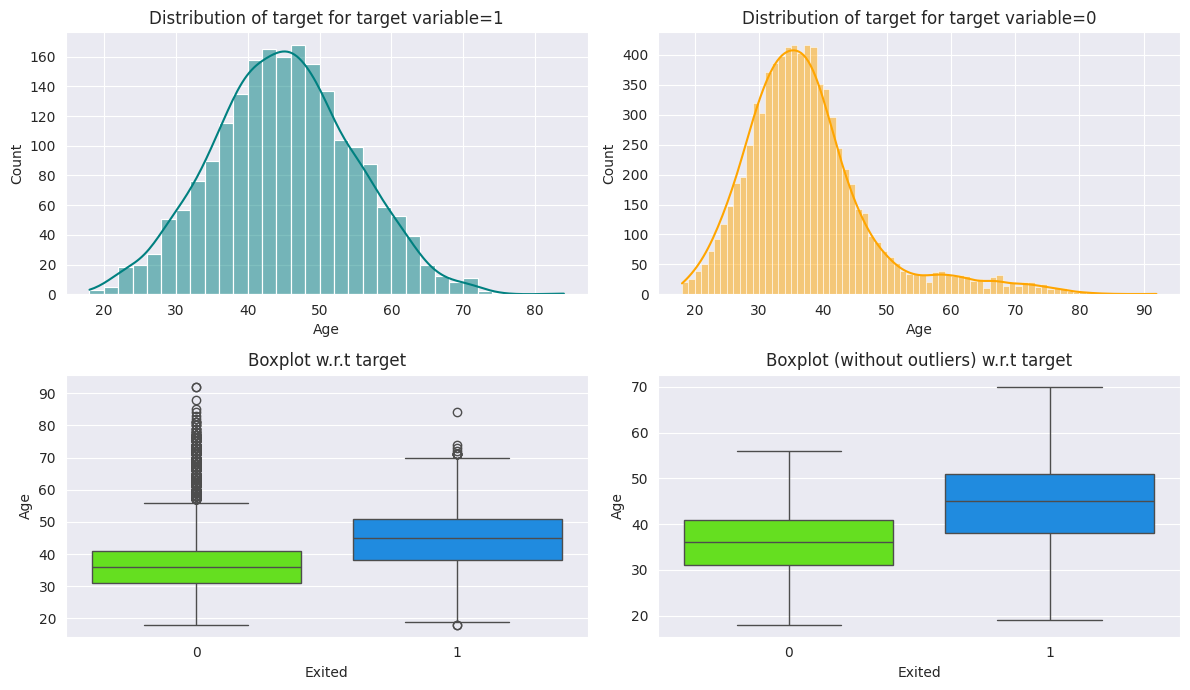

In [28]:
distribution_plot_wrt_target(data, "Age", "Exited");

Observation:

1.   The mode age is aroud 46. Most of the customers are young men around the age of 46
2.   The Average age is arounf 36 years old, and the minimum age is around 18 yeras
3.   There is outliers in the ages of the customers because some customer between the ages of 58 and 92 are present in the dataset
4.   When the outliers in the age variable is treated, the mode age fell back to 38 years old.
5.   The outliers in the age variable will not have any impact on our analysis because it is usually a natural course of life for ages to vary accordingly.


###Balance

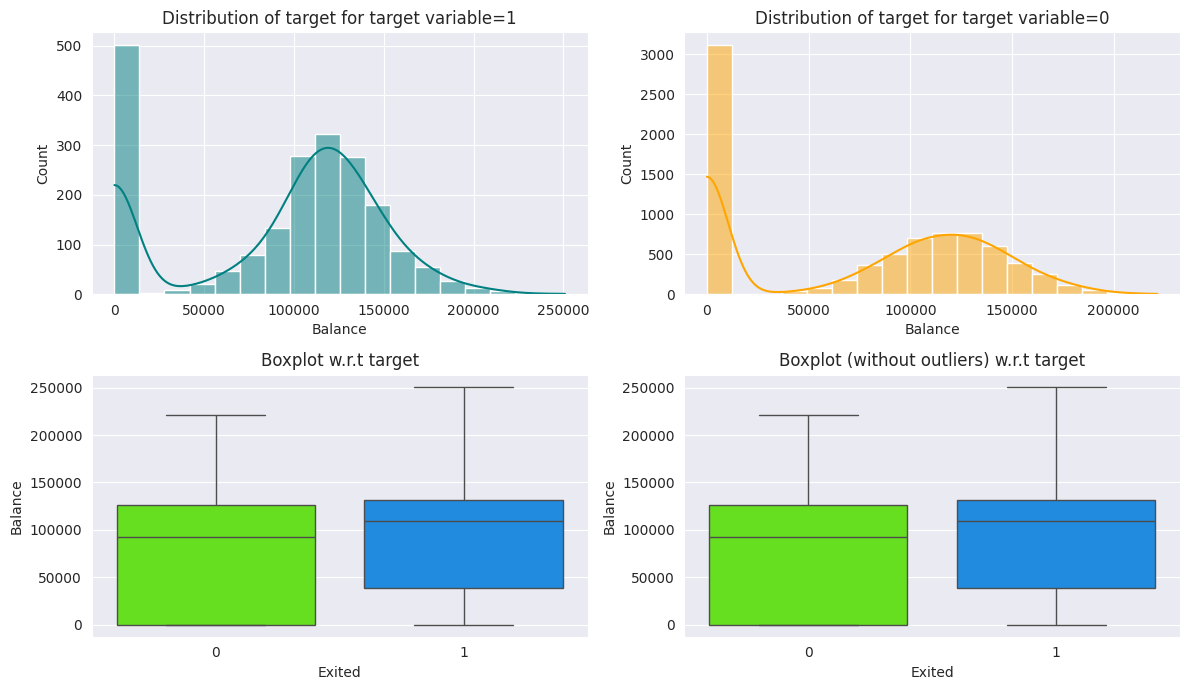

In [29]:
distribution_plot_wrt_target(data, "Balance", "Exited");

Observation

1.   The Balance variable of the dataset show that most of the customers of the bank maintianed zero dollar for the period covered by the analysis.
2.   This may be as a result of taking a cut-off period at the wrong time when the information were collated, or probably most of the bank accounts used in the analysis were salary accounts for workers and the information were collected after they may have withdrawn their money from their account or not. More question is needed to be asked in order to more fully understand why this is so.
3.   The second most maintained account balance amount is around $125000. We need to find out why there is so much gap.
4.   This independent variable is very important to our analysis.



###Tenure

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
--------------------------------------------------------------------------------


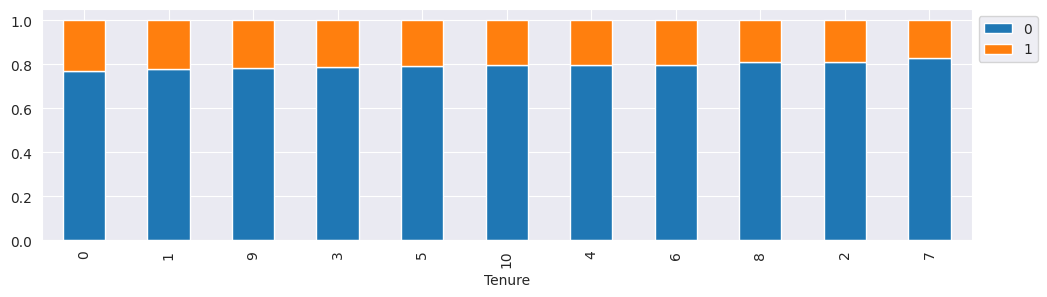

In [30]:
stacked_barplot(data, "Tenure", "Exited");

Observation

1.   Tenure can be described as the time period usually 12 months between the date of disbursal of a loan amount or credit card and so on, and the payment date of the last EMI
2.   in the analysis, there are 11 tenures in the variable
3.   The tunure of 2 years is the most commonly used tenure by the customers followed by tenure of 1 year.
4.   It remains to be seen how this variable will affect our study.



###Credit Score

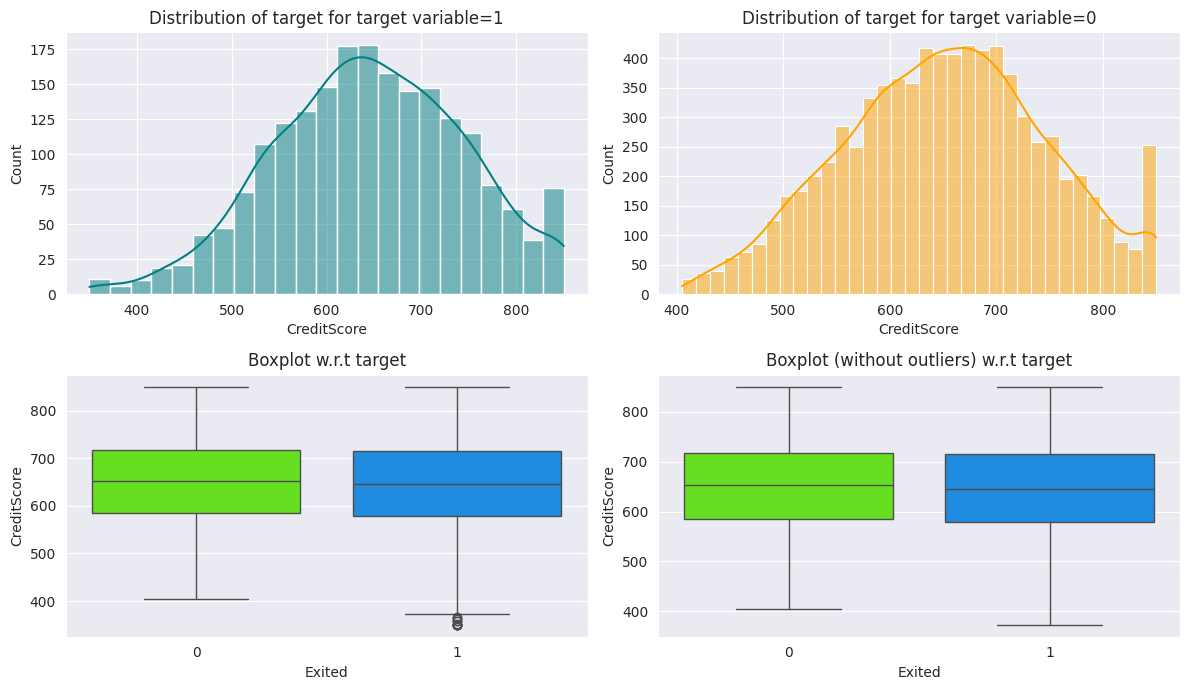

In [31]:
distribution_plot_wrt_target(data, "CreditScore", "Exited");

Observation
1.   The most credit score recorded and observed in the dataset is 650
2.   650 is also the average credit score in the dataset
3.   But few customers have very low credit score, those that are regarded as very POOR credit score - Below 400 score



###Estimated Salary

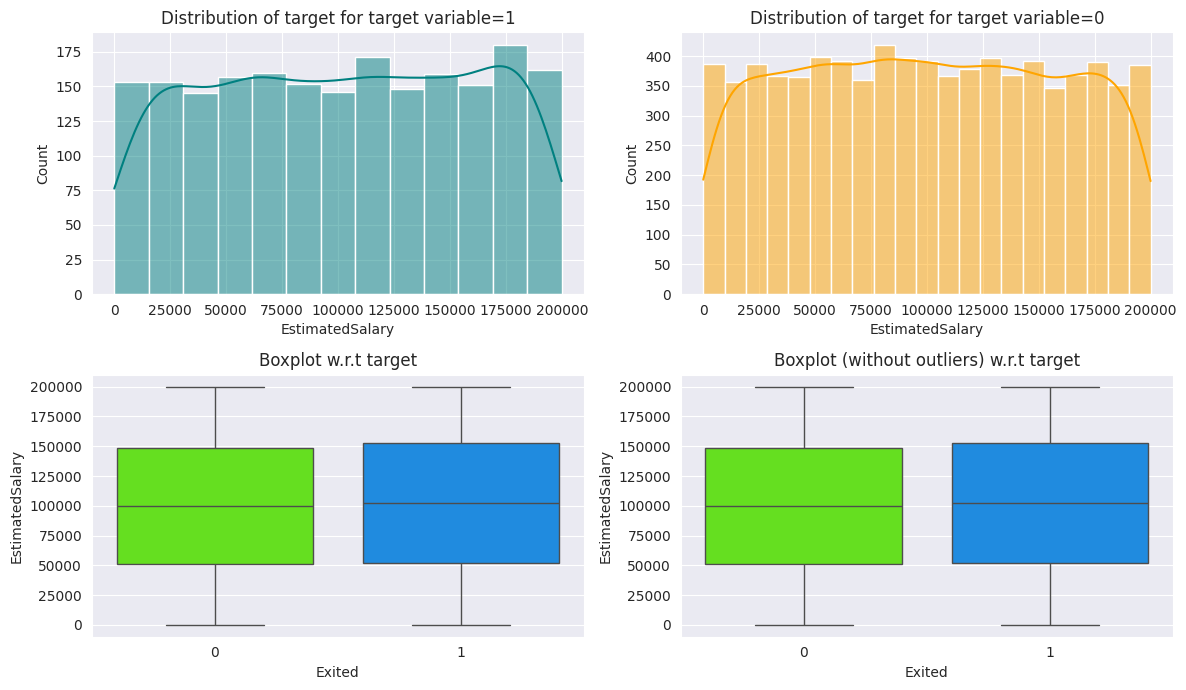

In [32]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited");

Observation

1.   Most of the Customers have estimated salsry of USD175000 followed by USD125000
2.   The average estimated salary is USD100000
3.   The percentage of customers whose estimated salary is above USD50000 constitute over 80% of the customers in the dataset
4.   These variable show that most of the banks customers are middle class income earners and the bank should take advantage of this income bracket people.
5.   This varaible wil surely have impact of whether a customer will churn or not churn. So it will be become more evident as this analysis is continued.


####***Pairplot of the dataset***

<Figure size 1500x700 with 0 Axes>

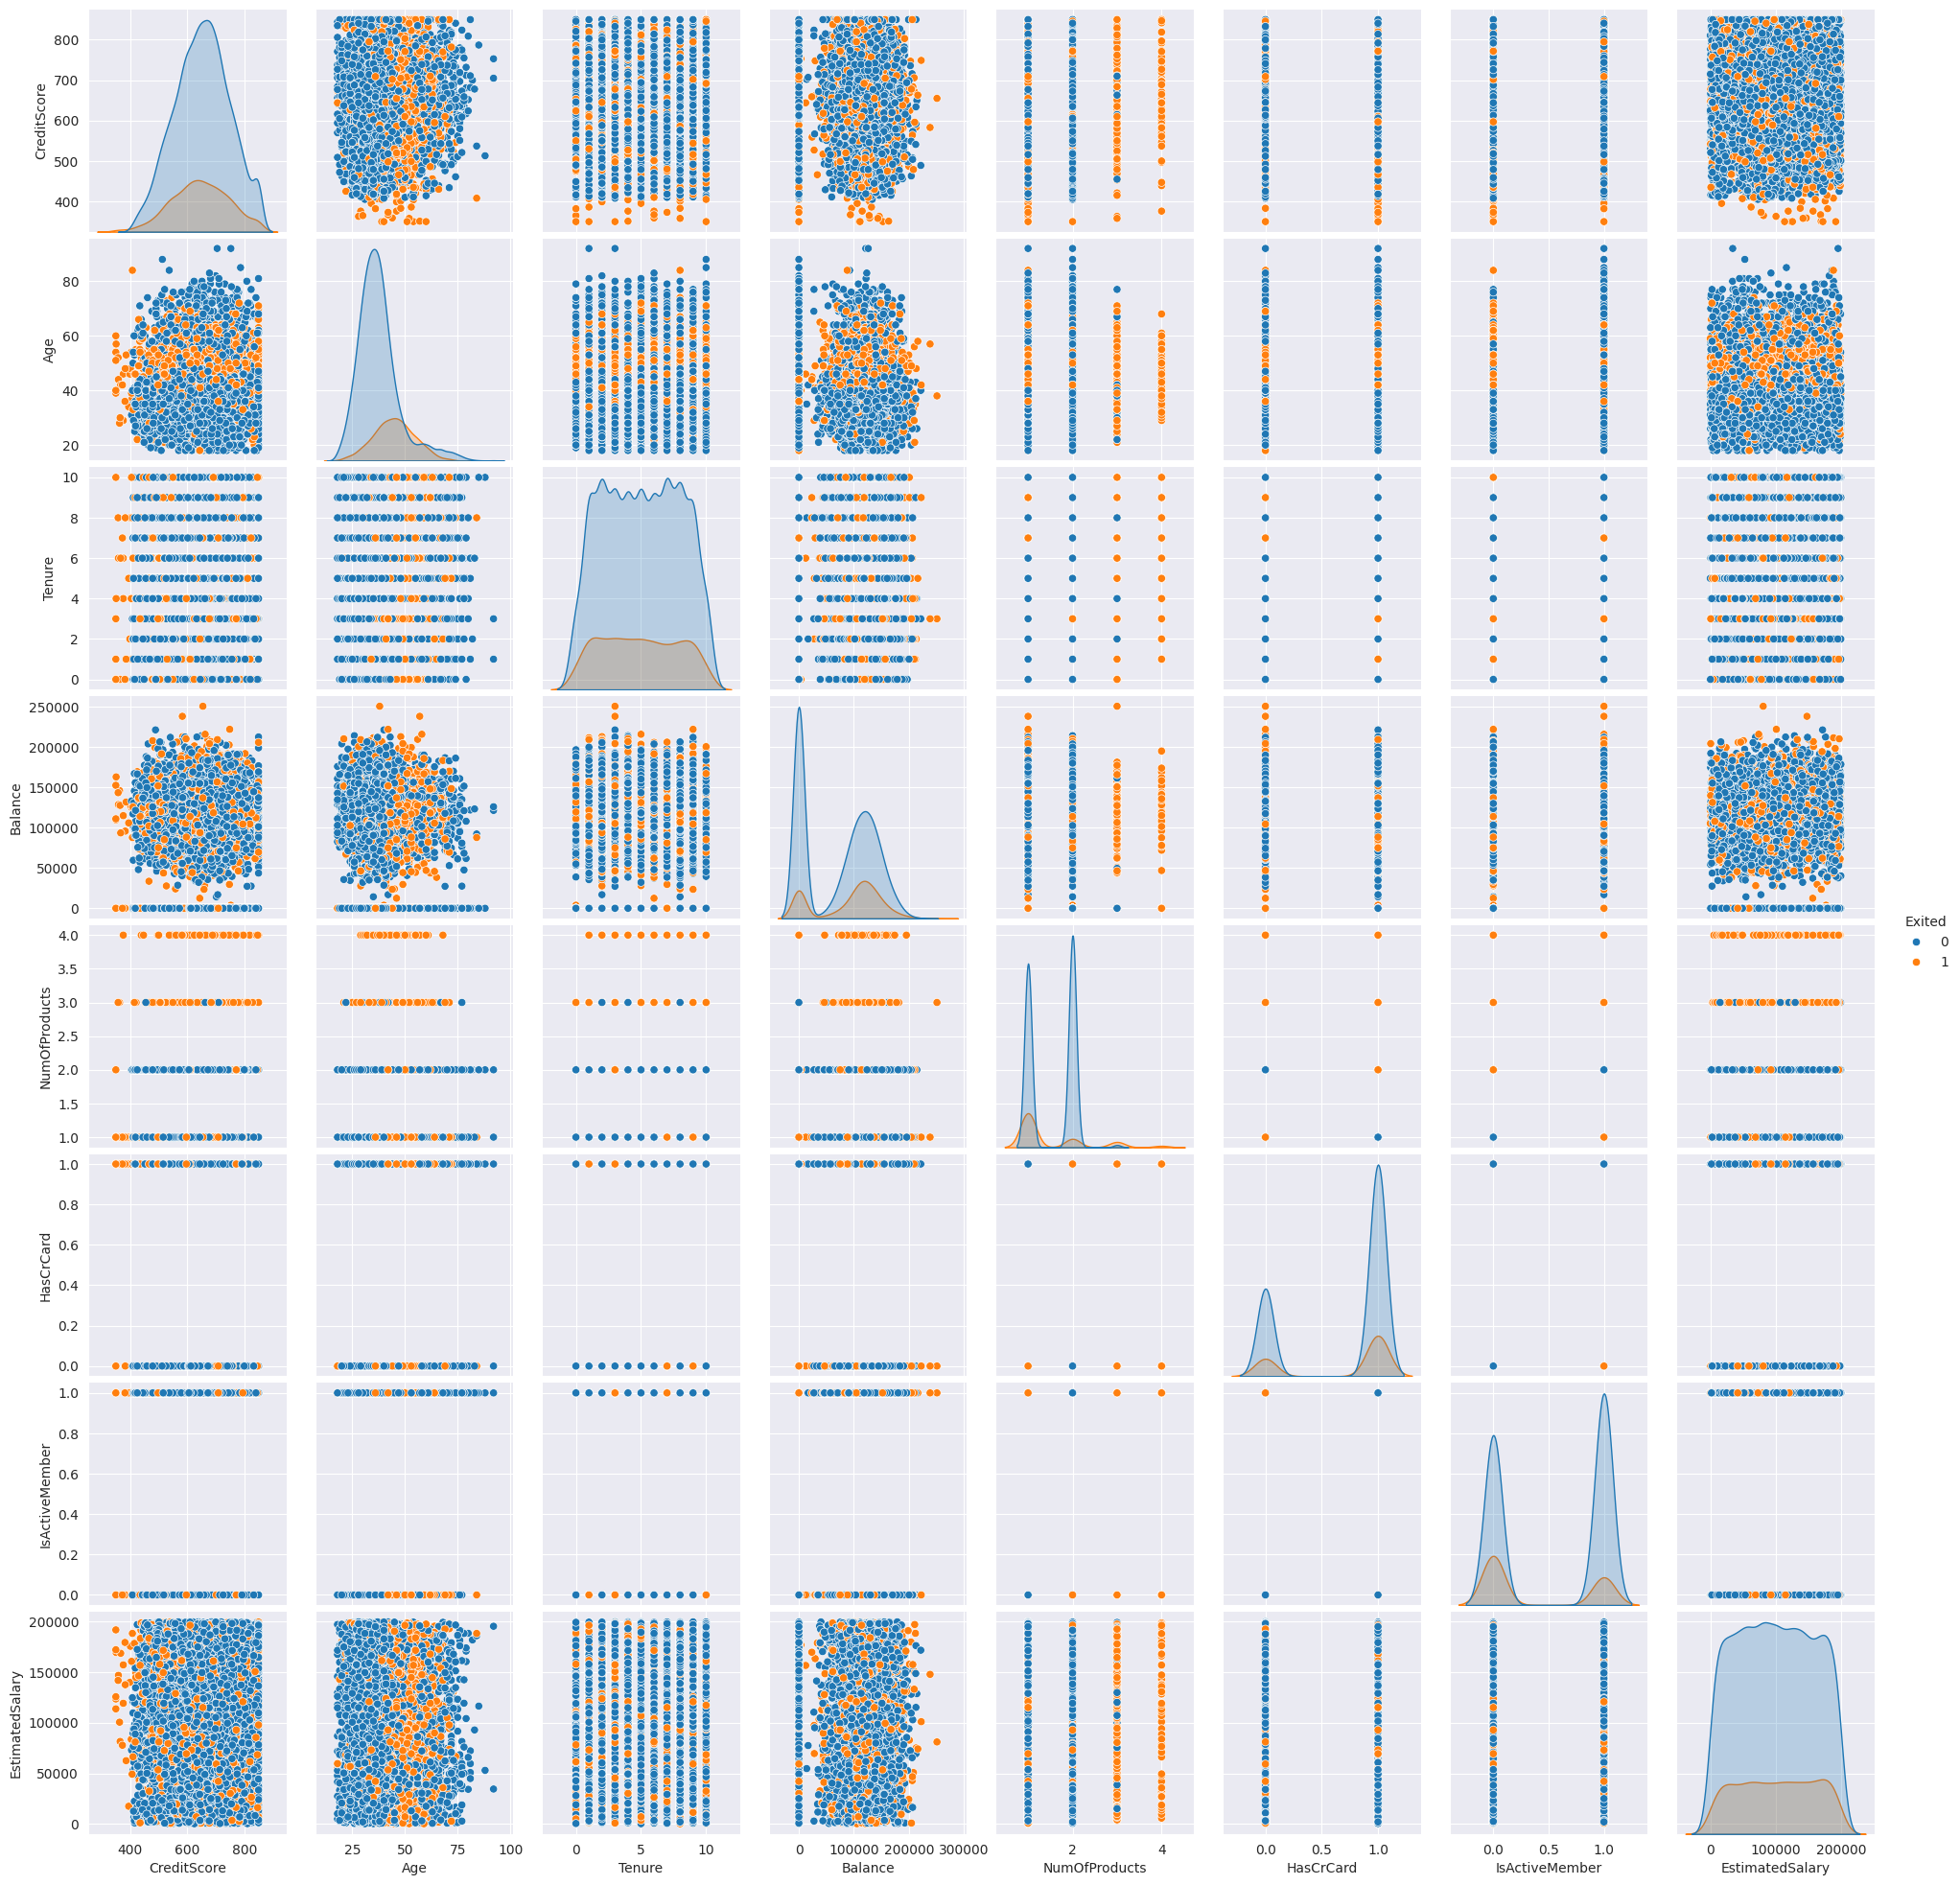

<Figure size 640x480 with 0 Axes>

In [33]:
# pairplot using Attrition flag, the dependent variable as emphasis
plt.figure(figsize=(15,7))
sns.pairplot(data, hue="Exited")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight');

Observation:

There are overlaps i.e. mostly no clear distinction in the distribution of most of the variables for people who have Churned and did not Churn.

1.   No clear distinction in the distribution of variables for people who have churned and did not churn as the colorations of the pairplot are widely inter-mingled.
2.   However, the following have lower amounts of churning customers;
    *   Active or Not Active
    *   Has Credit Card or Not
    *   Number of Products
    *   Tenure
3.   The Following Variables showed evidence of contributing to if a customer will churn or not;
    *   Balance
    *   Estimated Salary
    *   Age
    *   Credit Score

This will guide my approacha and how to focus on my analysis.

#Steps 3 to 11 are combined

##Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

Since our dataset contains categorical variables like “Gender” and “Geography,” we need to convert them into numerical format for the ANN model to process. We apply the one-hot encoding technique to transform these categorical columns into binary columns, representing different categories.

In [34]:
# use pandas dummies funtion for one hot encodeing
data = pd.get_dummies(data, columns=["Gender", "Geography"], drop_first=True)

In [35]:
#check the dataframe after the one hot encoding method is applied
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
0               1        101348.88       1        False              False   
1               1        112542.58       0        False              False   
2               0        113931.57       1        False              False   
3               0         93826.63       0        False              False   
4               1         79084.10       0        False              False   

   Geography_Spain  
0            False  
1             True  
2            False  
3            False  
4             True

In [36]:
data.sample(10)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9799          653   46       0  119556.10              1          1   
3576          647   28       8       0.00              2          1   
4235          595   29       6  150685.79              1          1   
5221          584   29       4       0.00              2          1   
2489          714   28       6  122724.37              1          1   
1308          710   33      10  118327.17              2          1   
7406          489   58       4       0.00              2          1   
3371          742   43       6   97067.69              1          0   
9717          757   30       3  145396.49              1          0   
7073          679   40       1       0.00              1          1   

      IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
9799               0         78250.13       1         True              False   
3576               1         91055.27       0         True              False   
4235               0         87771.06       0         True              False   
5221               0         88866.92       0        False              False   
2489               1         67057.27       0         True              False   
1308               1        192928.82       0         True              False   
7406               1        191419.32       0         True              False   
3371               1         60920.03       1        False               True   
9717               1        198341.15       0         True              False   
7073               1         16897.19       0         True              False   

      Geography_Spain  
9799            False  
3576            False  
4235            False  
5221             True  
2489            False  
1308            False  
7406             True  
3371            False  
9717             True  
7073            False

.

**Model Building Approach**

Before training our ANN model, we need to preprocess the data by separating the features and the target variable. we split the dataset into training and testing sets. The training set is used to train the model on historical data, while the testing set is used to evaluate the model’s performance on unseen data. Typically, around 70–80% of the data is used for training, and the remaining 20–30% is used for testing.

# Model Building

# Model Building: Artificial Neural Network

In [37]:
#Starting the model building
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Exited'])
y = data['Exited'].values

X_train_ann,X_test_ann,y_train_ann,y_test_ann=train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_ann.shape)
print("X_test Shape : ", X_test_ann.shape)
print("y_train Shape : ", y_train_ann.shape)
print("y_test Shape : ", y_test_ann.shape)

X_train Shape :  (8000, 11)
X_test Shape :  (2000, 11)
y_train Shape :  (8000,)
y_test Shape :  (2000,)


In [39]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_ann = scaler.fit_transform(X_train_ann)
X_test_ann = scaler.transform(X_test_ann)

In [40]:
# check the X_train_scaled values
X_train_ann

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [41]:
# check the X_est_scaled values
X_test_ann

array([[-1.03768121,  0.77498705, -1.0482813 , ...,  0.91509065,
        -0.58312392, -0.57273139],
       [ 0.30708683, -0.46686456, -0.70174202, ...,  0.91509065,
        -0.58312392, -0.57273139],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  0.91509065,
        -0.58312392,  1.74601919],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -1.09278791,
         1.71490137, -0.57273139],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  0.91509065,
         1.71490137, -0.57273139]])

In [42]:
model_ann = Sequential()
model_ann.add(Dense(11, activation='sigmoid', input_dim = 11))
model_ann.add(Dense(11, activation='sigmoid'))
model_ann.add(Dense(1, activation='sigmoid'))

In [43]:
model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_ann.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history_ann = model_ann.fit(X_train_ann, y_train_ann, epochs = 100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3298 - loss: 0.8753 - val_accuracy: 0.7975 - val_loss: 0.5076
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4908 - val_accuracy: 0.7975 - val_loss: 0.4820
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4854 - val_accuracy: 0.7975 - val_loss: 0.4672
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4518 - val_accuracy: 0.7981 - val_loss: 0.4540
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4512 - val_accuracy: 0.8031 - val_loss: 0.4443
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4288 - val_accuracy: 0.8138 - val_loss: 0.4387
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4322 - val_accuracy: 0.8138 - val_loss: 0.4347
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.4272 - val_accu

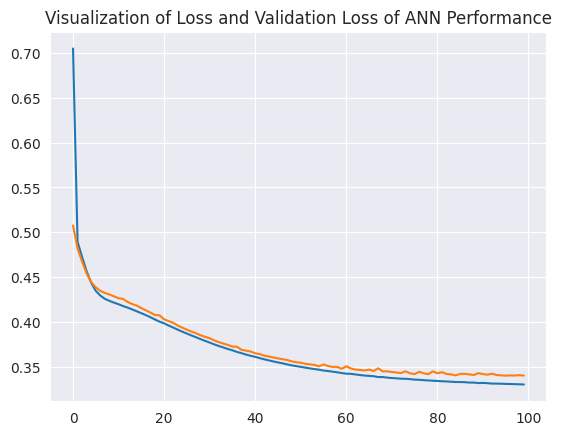

In [46]:
#checking the loss visualization
plt.title('Visualization of Loss and Validation Loss of ANN Performance')
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss']);

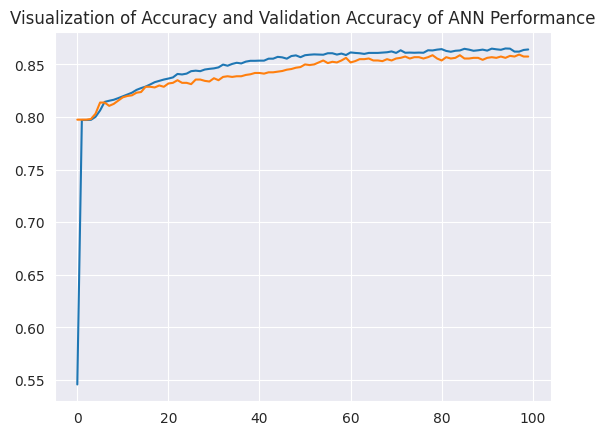

In [47]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Validation Accuracy of ANN Performance')
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy']);

In [48]:
y_log1 = model_ann.predict(X_test_ann)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [49]:
y_pred_ann = np.where(y_log1 > 0.5, 1, 0)

In [50]:
accuracy_score(y_test_ann, y_pred_ann)

0.8605

In [51]:
print(classification_report(y_test_ann, y_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.76      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Observation:

The model generates a churn prediction score or probability of ***86.60%***, indicating the likelihood of the customer churning.

# Model Building: Neural Network model with Adam Optimizer

In [52]:
X_train_adm,X_test_adm,y_train_adm,y_test_adm=train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_adm.shape)
print("X_test Shape : ", X_test_adm.shape)
print("y_train Shape : ", y_train_adm.shape)
print("y_test Shape : ", y_test_adm.shape)

X_train Shape :  (8000, 11)
X_test Shape :  (2000, 11)
y_train Shape :  (8000,)
y_test Shape :  (2000,)


In [54]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_adm = scaler.fit_transform(X_train_adm)
X_test_adm = scaler.transform(X_test_adm)

In [55]:
# check the X_train_scaled values
X_train_adm

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [56]:
# check the X_train_scaled values
X_test_adm

array([[-1.03768121,  0.77498705, -1.0482813 , ...,  0.91509065,
        -0.58312392, -0.57273139],
       [ 0.30708683, -0.46686456, -0.70174202, ...,  0.91509065,
        -0.58312392, -0.57273139],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  0.91509065,
        -0.58312392,  1.74601919],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -1.09278791,
         1.71490137, -0.57273139],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  0.91509065,
         1.71490137, -0.57273139]])

In [57]:
model_adm = Sequential()
model_adm.add(Dense(11, activation='relu', input_dim = 11))
model_adm.add(Dense(11, activation='relu'))
model_adm.add(Dense(1, activation='sigmoid'))

In [58]:
model_adm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model_adm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [60]:
history_adm =model_adm.fit(X_train_adm,y_train_adm,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6306 - loss: 0.6669 - val_accuracy: 0.7987 - val_loss: 0.5039
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4840 - val_accuracy: 0.8100 - val_loss: 0.4544
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4344 - val_accuracy: 0.8131 - val_loss: 0.4390
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4280 - val_accuracy: 0.8175 - val_loss: 0.4311
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4215 - val_accuracy: 0.8169 - val_loss: 0.4243
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4161 - val_accuracy: 0.8188 - val_loss: 0.4208
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.4090 - val_accuracy: 0.8206 - val_loss: 0.4178
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8340 - loss: 0.4057 - val_accu

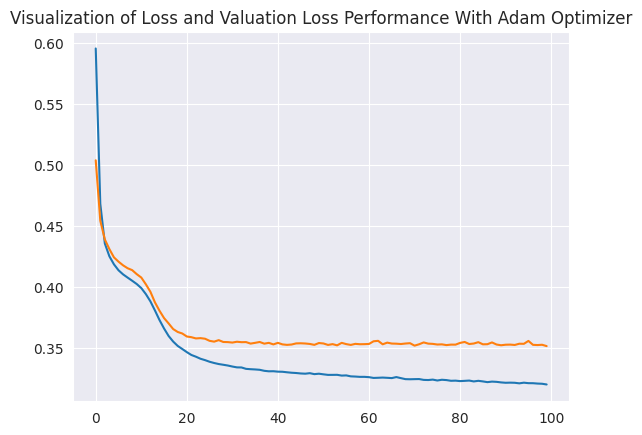

In [61]:
#Checking the loss visualization
plt.title('Visualization of Loss and Valuation Loss Performance With Adam Optimizer')
plt.plot(history_adm.history['loss'])
plt.plot(history_adm.history['val_loss']);

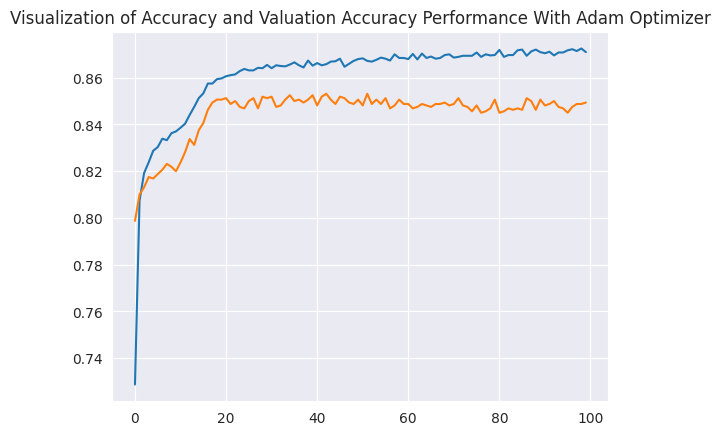

In [62]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Valuation Accuracy Performance With Adam Optimizer')
plt.plot(history_adm.history['accuracy'])
plt.plot(history_adm.history['val_accuracy']);

In [63]:
y_log_adm = model_adm.predict(X_test_adm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [64]:
y_pred_adm = np.where(y_log_adm > 0.5, 1, 0)

In [65]:
accuracy_score(y_test_adm, y_pred_adm)

0.863

In [66]:
print(classification_report(y_test_adm, y_pred_adm))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.47      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



Observation:

The model generates a churn prediction score or probability of ***86.80%***, indicating the likelihood of the customer churning.

# Model Improvement: Neural Network model with Dropout Optimizer

In [67]:
X_train_dpo,X_test_dpo,y_train_dpo,y_test_dpo=train_test_split(X,y,test_size=0.2,random_state=1)

In [68]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_dpo.shape)
print("X_test Shape : ", X_test_dpo.shape)
print("y_train Shape : ", y_train_dpo.shape)
print("y_test Shape : ", y_test_dpo.shape)

X_train Shape :  (8000, 11)
X_test Shape :  (2000, 11)
y_train Shape :  (8000,)
y_test Shape :  (2000,)


In [69]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled_dpo = scaler.fit_transform(X_train_dpo)
X_test_scaled_dpo = scaler.transform(X_test_dpo)

In [70]:
X_train_scaled_dpo

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [71]:
X_test_scaled_dpo

array([[-1.03768121,  0.77498705, -1.0482813 , ...,  0.91509065,
        -0.58312392, -0.57273139],
       [ 0.30708683, -0.46686456, -0.70174202, ...,  0.91509065,
        -0.58312392, -0.57273139],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  0.91509065,
        -0.58312392,  1.74601919],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -1.09278791,
         1.71490137, -0.57273139],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  0.91509065,
         1.71490137, -0.57273139]])

In [72]:
# Define the model
model1 = Sequential()
model1.add(Dense(11, activation='relu', input_shape=(11,)))
model1.add(Dropout(0.5))
model1.add(Dense(11, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

In [73]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
history_dpo = model1.fit(X_train_scaled_dpo, y_train_dpo, epochs = 100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7721 - loss: 0.5769 - val_accuracy: 0.7975 - val_loss: 0.4869
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.5135 - val_accuracy: 0.7975 - val_loss: 0.4624
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4910 - val_accuracy: 0.7975 - val_loss: 0.4496
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.4768 - val_accuracy: 0.7975 - val_loss: 0.4438
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4765 - val_accuracy: 0.7975 - val_loss: 0.4375
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4576 - val_accuracy: 0.7975 - val_loss: 0.4360
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4609 - val_accuracy: 0.7975 - val_loss: 0.4338
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4491 - val_accu

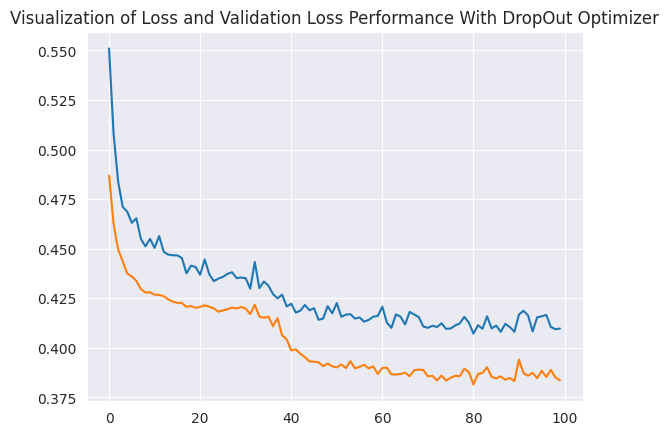

In [76]:
#checking loss visualization
plt.title('Visualization of Loss and Validation Loss Performance With DropOut Optimizer')
plt.plot(history_dpo.history['loss'])
plt.plot(history_dpo.history['val_loss']);

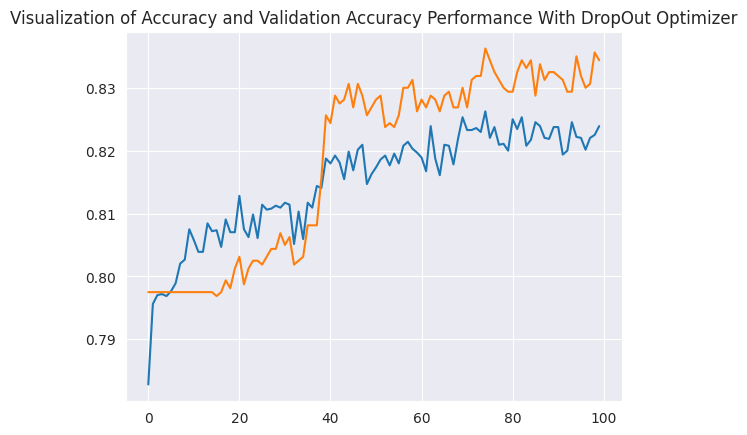

In [77]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Validation Accuracy Performance With DropOut Optimizer')
plt.plot(history_dpo.history['accuracy'])
plt.plot(history_dpo.history['val_accuracy']);

In [78]:
y_log1c = model1.predict(X_test_scaled_dpo)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [79]:
y_pred_dpo = np.where(y_log1c > 0.5, 1, 0)

In [80]:
accuracy_score(y_test_dpo, y_pred_dpo)

0.8305

In [81]:
print(classification_report(y_test_dpo, y_pred_dpo))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1585
           1       0.93      0.20      0.33       415

    accuracy                           0.83      2000
   macro avg       0.88      0.60      0.61      2000
weighted avg       0.85      0.83      0.78      2000



Observation:

The model generates a churn prediction score or probability of ***82.00%***, indicating the likelihood of the customer churning.

# Model Improvement: Neural Network model with Hyperparameter Tuning

In [82]:
X_train_hpt,X_test_hpt,y_train_hpt,y_test_hpt=train_test_split(X,y,test_size=0.2,random_state=1)

In [83]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_hpt.shape)
print("X_test Shape : ", X_test_hpt.shape)
print("y_train Shape : ", y_train_hpt.shape)
print("y_test Shape : ", y_test_hpt.shape)

X_train Shape :  (8000, 11)
X_test Shape :  (2000, 11)
y_train Shape :  (8000,)
y_test Shape :  (2000,)


In [84]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled_hpt = scaler.fit_transform(X_train_hpt)
X_test_scaled_hpt = scaler.transform(X_test_hpt)

In [85]:
# check the X_train_scaled values
X_train_scaled_hpt

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [86]:
X_test_scaled_hpt

array([[-1.03768121,  0.77498705, -1.0482813 , ...,  0.91509065,
        -0.58312392, -0.57273139],
       [ 0.30708683, -0.46686456, -0.70174202, ...,  0.91509065,
        -0.58312392, -0.57273139],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  0.91509065,
        -0.58312392,  1.74601919],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -1.09278791,
         1.71490137, -0.57273139],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  0.91509065,
         1.71490137, -0.57273139]])

In [87]:
# Define the hyperparameter space
hyperparameters = {
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001,0.01,0.1,0.05]
}

In [88]:
# Create the neural network model
model_hpt = Sequential()
model_hpt.add(Dense(11, activation='relu', input_dim = 11))
model_hpt.add(Dense(11, activation='relu'))
model_hpt.add(Dense(1, activation='sigmoid'))

In [89]:
model_hpt.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Compile the model
model_hpt.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
history_hpt = model_hpt.fit(X_train_scaled_hpt, y_train_hpt, epochs = 100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7786 - loss: 0.5586 - val_accuracy: 0.7975 - val_loss: 0.4793
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4680 - val_accuracy: 0.8050 - val_loss: 0.4415
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4274 - val_accuracy: 0.8200 - val_loss: 0.4241
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4116 - val_accuracy: 0.8275 - val_loss: 0.4119
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.4036 - val_accuracy: 0.8313 - val_loss: 0.4012
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.4038 - val_accuracy: 0.8325 - val_loss: 0.3917
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.4013 - val_accuracy: 0.8406 - val_loss: 0.3794
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.3601 - val_accu

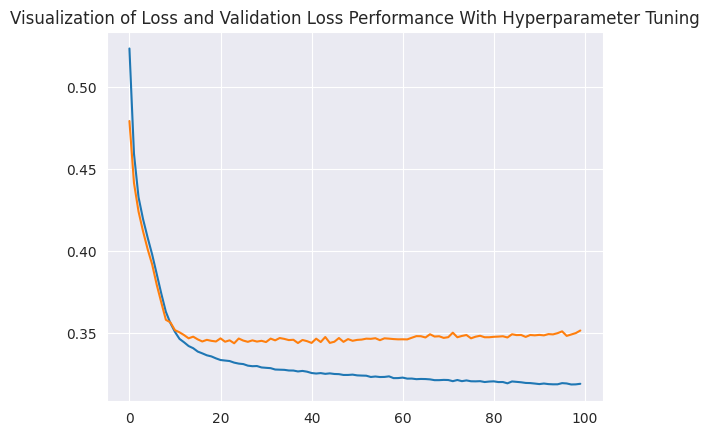

In [92]:
#checking the loss visualization
plt.title('Visualization of Loss and Validation Loss Performance With Hyperparameter Tuning')
plt.plot(history_hpt.history['loss'])
plt.plot(history_hpt.history['val_loss']);

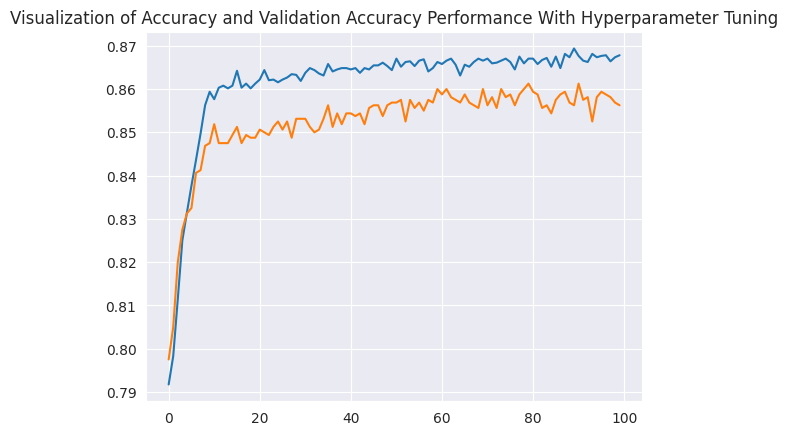

In [93]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Validation Accuracy Performance With Hyperparameter Tuning')
plt.plot(history_hpt.history['accuracy'])
plt.plot(history_hpt.history['val_accuracy']);

In [94]:
y_log_hpt = model_hpt.predict(X_test_scaled_hpt)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [95]:
y_pred_hpt = np.where(y_log_hpt > 0.5, 1, 0)

In [96]:
accuracy_score(y_test_hpt, y_pred_hpt)

0.8695

In [97]:
print(classification_report(y_test_hpt, y_pred_hpt))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.81      0.48      0.61       415

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Observation:

The model generates a churn prediction score or probability of ***86.55%***, indicating the likelihood of the customer churning.

# Model Improvement: Neural Network model with balanced data

Customer churn datasets often suffer from class imbalance, where the number of churners is significantly smaller than non-churners. To address this issue, we will balance the target column by upsampling the minority class. This ensures that the model does not get biased towards the majority class during training.

In [98]:
# Separate majority and minority classes
majority_class = data[data['Exited'] == 0]
minority_class = data[data['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [99]:
# check the target_balanced_data
balanced_data

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1             608   41       1   83807.86              1          0   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
6             822   50       7       0.00              2          1   
8             501   44       4  142051.07              2          0   
...           ...  ...     ...        ...            ...        ...   
5701          625   49       4  128504.76              1          1   
9337          466   47       5  102085.72              1          1   
4345          720   46       3   97042.60              1          1   
1085          803   42       5       0.00              1          1   
3694          608   33       4       0.00              1          1   

      IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
1                  1        112542.58       0        False              False   
3                  0         93826.63       0        False              False   
4                  1         79084.10       0        False              False   
6                  1         10062.80       0         True              False   
8                  1         74940.50       0         True              False   
...              ...              ...     ...          ...                ...   
5701               0        126812.63       1        False               True   
9337               1        183536.24       1        False               True   
4345               1        133516.51       1         True               True   
1085               0        196466.83       1         True              False   
3694               0         79304.38       1        False              False   

      Geography_Spain  
1                True  
3               False  
4                True  
6               False  
8               False  
...               ...  
5701            False  
9337            False  
4345            False  
1085            False  
3694            False  

[15926 rows x 12 columns]

In [100]:
# check again the value counts of "Exited" target column after the balancing the data.
data_exit1 = balanced_data['Exited'].value_counts()
data_exit1

Exited
0    7963
1    7963
Name: count, dtype: int64

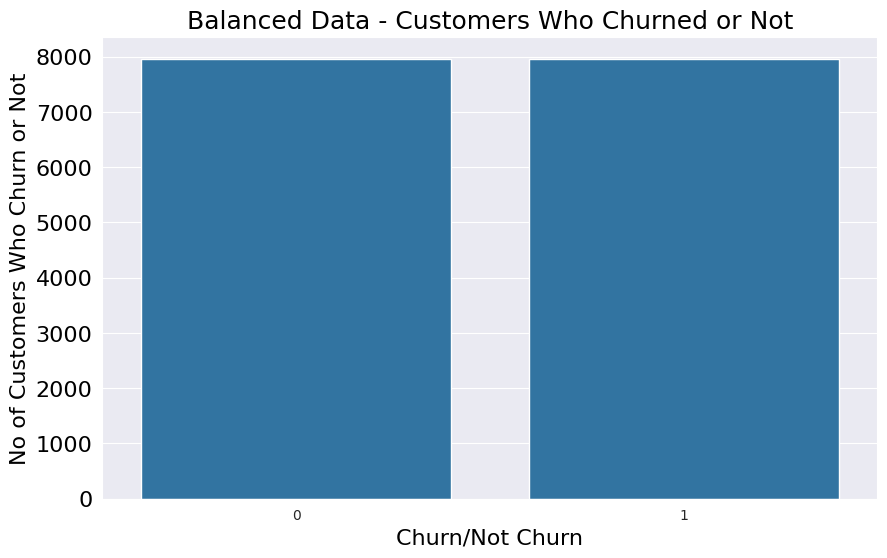

In [101]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(10,6))
res=sns.barplot(y=data_exit1, x=data_exit1.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('No of Customers Who Churn or Not',fontsize = 16, color='black')
plt.xlabel('Churn/Not Churn',fontsize = 16, color='black')
plt.title('Balanced Data - Customers Who Churned or Not',fontsize = 18, color='black')
plt.show()

In [102]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [103]:
# use sklearn for train_test_split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [104]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_bal.shape)
print("X_test Shape : ", X_test_bal.shape)
print("y_train Shape : ", y_train_bal.shape)
print("y_test Shape : ", y_test_bal.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


In [105]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled_bal = scaler.fit_transform(X_train_bal)
X_test_scaled_bal = scaler.transform(X_test_bal)

In [106]:
# check the X_train_scaled values
X_train_scaled_bal

array([[-0.23415932,  0.17867584, -0.34133383, ...,  0.97442428,
        -0.6617577 , -0.54820692],
       [ 1.20116567,  0.83930236,  1.36239323, ..., -1.02624701,
        -0.6617577 , -0.54820692],
       [ 0.05290568, -0.76507633, -1.36357006, ...,  0.97442428,
        -0.6617577 , -0.54820692],
       ...,
       [ 0.9756146 ,  2.25493062, -1.02282465, ...,  0.97442428,
         1.51112711, -0.54820692],
       [ 0.47325086, -0.95382676,  1.70313864, ..., -1.02624701,
        -0.6617577 , -0.54820692],
       [ 0.30921371,  0.93367758, -1.36357006, ..., -1.02624701,
         1.51112711, -0.54820692]])

In [107]:
# check the X_est_scaled values
X_test_scaled_bal

array([[-0.37769182,  0.46180149,  0.340157  , ...,  0.97442428,
        -0.6617577 ,  1.82412874],
       [-0.72627074,  0.17867584, -0.68207924, ..., -1.02624701,
         1.51112711, -0.54820692],
       [ 0.28870907, -0.10444981, -1.02282465, ..., -1.02624701,
        -0.6617577 , -0.54820692],
       ...,
       [ 0.50400782, -0.85945155,  0.68090241, ...,  0.97442428,
        -0.6617577 , -0.54820692],
       [-0.04961753,  1.97180497,  1.36239323, ...,  0.97442428,
        -0.6617577 , -0.54820692],
       [ 0.47325086, -0.57632589,  0.68090241, ..., -1.02624701,
        -0.6617577 ,  1.82412874]])

In [108]:
model_bal = Sequential()
model_bal.add(Dense(11, activation='relu', input_dim = 11))
model_bal.add(Dense(11, activation='relu'))
model_bal.add(Dense(1, activation='sigmoid'))

In [109]:
model_bal.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model_bal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
history_bal = model_bal.fit(X_train_scaled_bal, y_train_bal, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6341 - loss: 0.6438 - val_accuracy: 0.6994 - val_loss: 0.5719
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7187 - loss: 0.5620 - val_accuracy: 0.7363 - val_loss: 0.5362
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7398 - loss: 0.5234 - val_accuracy: 0.7469 - val_loss: 0.5124
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.5093 - val_accuracy: 0.7531 - val_loss: 0.4979
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7543 - loss: 0.4927 - val_accuracy: 0.7622 - val_loss: 0.4856
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7677 - loss: 0.4766 - val_accuracy: 0.7649 - val_loss: 0.4781
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 0.4824 - val_accuracy: 0.7700 - val_loss: 0.4715
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.4679 - val_accu

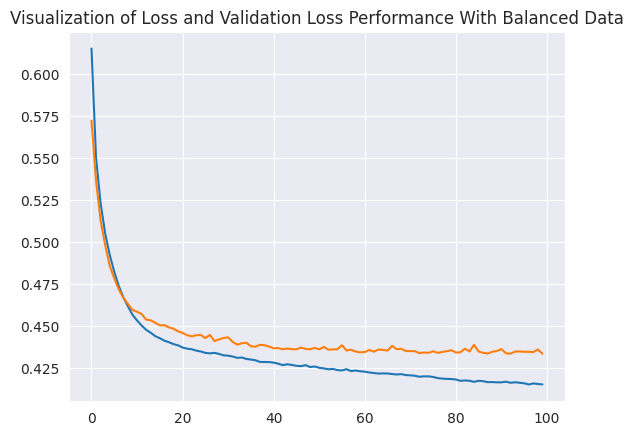

In [112]:
#checking the loss visualization
plt.title('Visualization of Loss and Validation Loss Performance With Balanced Data')
plt.plot(history_bal.history['loss'])
plt.plot(history_bal.history['val_loss']);

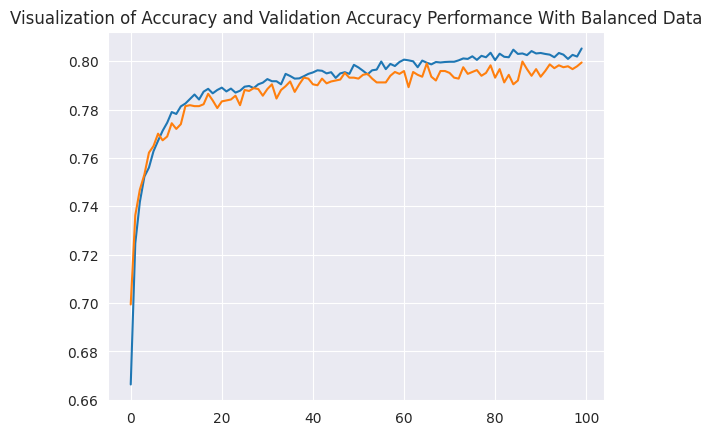

In [113]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Validation Accuracy Performance With Balanced Data')
plt.plot(history_bal.history['accuracy'])
plt.plot(history_bal.history['val_accuracy']);

In [114]:
y_log_bal = model_bal.predict(X_test_scaled_bal)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [115]:
y_pred_bal = np.where(y_log_bal > 0.5, 1, 0)

In [116]:
accuracy_score(y_test_bal, y_pred_bal)

0.7981795354676711

In [117]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1536
           1       0.81      0.80      0.80      1650

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



The model generates a churn prediction score or probability of ***80.10%***, indicating the likelihood of the customer churning.

# Model Improvement: Neural Network model with Batch Normalization

In [118]:
# use sklearn for train_test_split
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train_bn.shape)
print("X_test Shape : ", X_test_bn.shape)
print("y_train Shape : ", y_train_bn.shape)
print("y_test Shape : ", y_test_bn.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


In [120]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled_bn = scaler.fit_transform(X_train_bn)
X_test_scaled_bn = scaler.transform(X_test_bn)

In [121]:
X_train_scaled_bn

array([[ 1.74458075e+00,  2.64948525e-01,  1.02260197e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 1.24130320e+00,  7.61019204e-02,  8.82175645e-04, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 8.06835512e-02, -1.83213817e-02,  1.02260197e+00, ...,
         9.74118179e-01,  1.50360032e+00, -5.47359263e-01],
       ...,
       [ 3.16915869e-01, -8.68131101e-01,  8.82175645e-04, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [ 4.60709454e-01, -4.90437892e-01, -3.39691089e-01, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [-2.68529441e-01, -1.12744684e-01,  1.70374850e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01]])

In [122]:
X_test_scaled_bn

array([[ 0.46070945,  0.45379513, -1.02083762, ...,  0.97411818,
        -0.66507036,  1.82695364],
       [-1.34698133, -0.39601459,  1.02260197, ..., -1.02656949,
        -0.66507036, -0.54735926],
       [-1.19291677, -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364],
       ...,
       [-0.11446489, -1.0569777 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-1.0799361 , -0.7737078 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-2.4665171 , -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364]])

In [123]:
model_bn = tf.keras.Sequential([
  tf.keras.layers.Dense(11, input_shape=(11,), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [124]:
model_bn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 34 (136.00 B)

In [125]:
model_bn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
history_bn = model_bn.fit(X_train_scaled_bn, y_train_bn, epochs = 100, validation_split=0.25)

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6031 - loss: 0.6740 - val_accuracy: 0.6936 - val_loss: 0.6003
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6921 - loss: 0.5912 - val_accuracy: 0.7256 - val_loss: 0.5540
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7227 - loss: 0.5513 - val_accuracy: 0.7413 - val_loss: 0.5227
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7368 - loss: 0.5237 - val_accuracy: 0.7545 - val_loss: 0.5051
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 0.5110 - val_accuracy: 0.7604 - val_loss: 0.4949
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7557 - loss: 0.5034 - val_accuracy: 0.7582 - val_loss: 0.4876
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7434 - loss: 0.5039 - val_accuracy: 0.7661 - val_loss: 0.4815
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7523 - loss: 0.4955 - val_accu

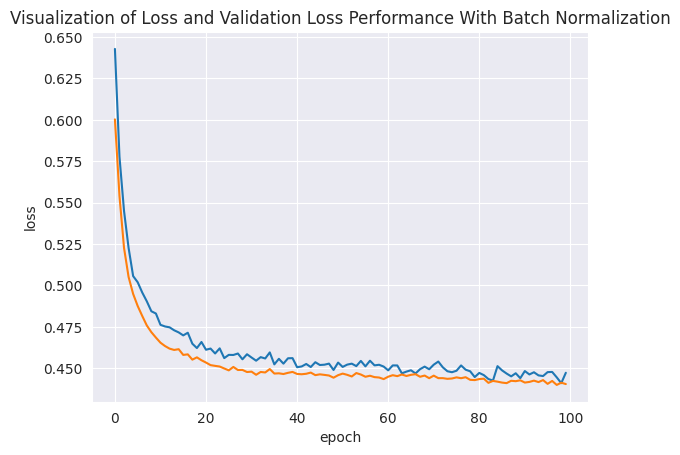

In [127]:
#checking the loss visualization
plt.title('Visualization of Loss and Validation Loss Performance With Batch Normalization')
plt.plot(history_bn.history['loss'])
plt.plot(history_bn.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch');

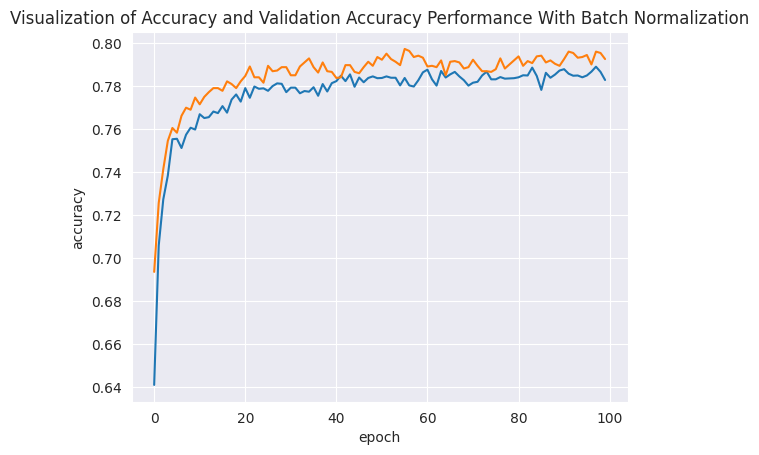

In [128]:
#checking the accuracy visualization
plt.title('Visualization of Accuracy and Validation Accuracy Performance With Batch Normalization')
plt.plot(history_bn.history['accuracy'])
plt.plot(history_bn.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch');

In [129]:
y_log_bn = model_bn.predict(X_test_scaled_bn)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [130]:
y_pred_bn = np.where(y_log_bn > 0.5, 1, 0)

In [131]:
accuracy_score(y_test_bn, y_pred_bn)

0.7890772128060264

In [132]:
print(classification_report(y_test_bn, y_pred_bn))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1605
           1       0.80      0.77      0.78      1581

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



Observation:

The model generates a churn prediction score or probability of ***85.55%***, indicating the likelihood of the customer churning.

#Step 12 and Final

In [133]:
# create a dataframe from the accuracy perfomance of the models
perf_accuracy = {
    "Artificial Neural Network Performance - Accuracy Score": 86.60,
    "Artificial Neural Network with Adam Optmizer Performance - Accuracy Score": 86.80,
    "Artificial Neural Network with DropOut Optimizer Performance - Accuracy Score": 82.00,
    "Artificial Neural Network with Hyperparameter Tuning Performance - Accuracy Score": 86.55,
    "Artificial Neural Network with Balanced Data Performance - Accuracy Score": 80.10,
    "Artificial Neural Network with Batch Normalization Performance - Accuracy Score": 85.55,
}
perf_accuracy = pd.DataFrame.from_dict(
    perf_accuracy, orient="index", columns=["Accuracy Scores"]
)
display(perf_accuracy.sort_values("Accuracy Scores"))

Accuracy Scores
Artificial Neural Network with Balanced Data Pe...            80.10
Artificial Neural Network with DropOut Optimize...            82.00
Artificial Neural Network with Batch Normalizat...            85.55
Artificial Neural Network with Hyperparameter T...            86.55
Artificial Neural Network Performance - Accurac...            86.60
Artificial Neural Network with Adam Optmizer Pe...            86.80

Observation:

All the 6 neural neteork used to analyse the data score 80% and above. However, 3 of them scored above 86% according to the results generated

There are 3 artificial neural network that scored 86% and above; these are

1. Artificial Neural Network Performance - Accuracy Score
2. Artificial Neural Network with Hyperparameter Tuning Performance - Accuracy Score
3. Artificial Neural Network with Adam Optmizer Performance - Accuracy Score

I will endeavor to check the features importance of these models in order to see how to understand the prediction performance in a real life situation.


Use the SHAP code to get the most importance feature of the model. I will use SHAP because our model analysis is a sequential analysis.

In [134]:
pip install shap

In [145]:
pip install tensorflow

##Feature Importance - Model Optimized with Hyperparameter Tuning

Shape of X_to_explain: (1500, 11)
Shape of shap_values_raw (list of arrays): 1500
Shape of shap_values_raw[0]: (11, 1)


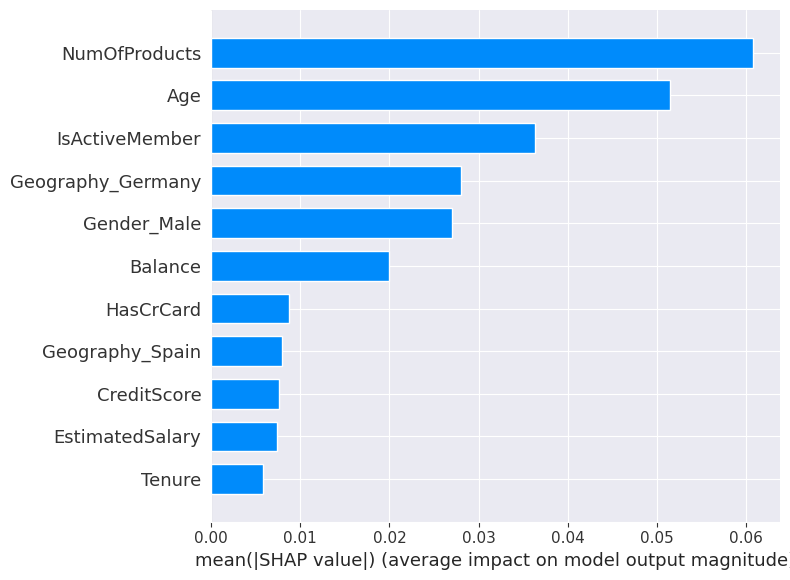

In [157]:
import shap
from tensorflow.keras import Sequential
import numpy as np


# load JS visualization code to notebook
shap.initjs()

# Scale the entire X DataFrame using the scaler fitted on X_train_hpt
X_scaled = scaler.transform(X)

# explain the model's predictions using SHAP
explainer = shap.DeepExplainer(model_hpt,data=X_scaled[:1500])

# Limit the number of samples to explain for the SHAP values calculation
X_to_explain = X_scaled[:1500]
shap_values_raw = explainer.shap_values(X_to_explain)

print(f"Shape of X_to_explain: {X_to_explain.shape}")
print(f"Shape of shap_values_raw (list of arrays): {len(shap_values_raw)}")
if len(shap_values_raw) > 0:
    print(f"Shape of shap_values_raw[0]: {shap_values_raw[0].shape}")

# DeepExplainer can return a list of arrays, where each array corresponds to one output.
# For a single-output model, it should be a list of one array: [shap_values_for_all_samples]
# However, the print statement indicates shap_values_raw is a list of 1500 arrays,
# where each internal array has shape (11, 1). This implies it's per-sample.

# So, we need to stack the individual (11,1) shap_values into a (1500,11) matrix.
shap_values_matrix = np.array([s.squeeze(axis=-1) for s in shap_values_raw])

# For summary_plot, we need features (X) to match the number of samples in shap_values_matrix
# So, we should also take the corresponding subset of X for feature names.
X_for_summary_plot = X.iloc[:X_to_explain.shape[0], :]

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# Note: X.iloc[0,:] is used here to get feature names for display, assuming order is maintained.
# The `shap_values[0][0,:]` might have an extra dimension of 1 for single-output models, so .squeeze() is used.
# shap.force_plot(explainer.expected_value[0], shap_values_raw[0][0,:].squeeze(), X.iloc[0,:])

# Use X_for_summary_plot (subset of original DataFrame for column names) for the summary plot
shap.summary_plot(shap_values_matrix, X_for_summary_plot, plot_type="bar")

##Feature Importance - Model - Neural Network

Shape of X_to_explain_ann: (1500, 11)
Shape of shap_values_ann (list of arrays): 1500
Shape of shap_values_ann[0]: (11, 1)


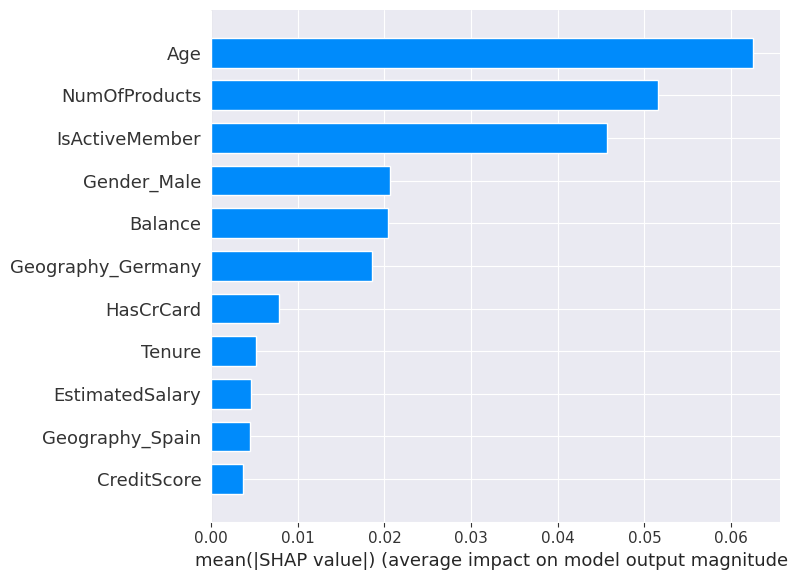

In [161]:
import shap
from tensorflow.keras import Sequential
import numpy as np


# load JS visualization code to notebook
shap.initjs()

# Scale the entire X DataFrame using the scaler fitted during previous steps
X_scaled_for_ann = scaler.transform(X)

# explain the model's predictions using SHAP
explainer = shap.DeepExplainer(model_ann,data=X_scaled_for_ann[:1500])

# Limit the number of samples to explain for the SHAP values calculation
X_to_explain_ann = X_scaled_for_ann[:1500]
shap_values_ann = explainer.shap_values(X_to_explain)

print(f"Shape of X_to_explain_ann: {X_to_explain_ann.shape}")
print(f"Shape of shap_values_ann (list of arrays): {len(shap_values_ann)}")
if len(shap_values_ann) > 0:
    print(f"Shape of shap_values_ann[0]: {shap_values_ann[0].shape}")

# DeepExplainer can return a list of arrays, where each array corresponds to one output.
# For a single-output model, it should be a list of one array: [shap_values_for_all_samples]
# However, shap_values_raw might be a list of per-sample explanations with shape (num_features, 1).

# So, we need to stack the individual (num_features,1) shap_values into a (num_samples, num_features) matrix.
shap_values_matrix = np.array([s.squeeze(axis=-1) for s in shap_values_ann])

# For summary_plot, we need features (X) to match the number of samples in shap_values_matrix
# So, we should also take the corresponding subset of X for feature names.
X_for_summary_plot = X.iloc[:X_to_explain_ann.shape[0], :]

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value[0], shap_values_raw[0][0,:].squeeze(), X.iloc[0,:])

# Use X_for_summary_plot (subset of original DataFrame for column names) for the summary plot
shap.summary_plot(shap_values_matrix, X_for_summary_plot, plot_type="bar")

##Feature Imporatance - Model Optimized with Adam Optimizer

Shape of X_to_explain_adm: (1500, 11)
Shape of shap_values_adm (list of arrays): 1500
Shape of shap_values_adm[0]: (11, 1)


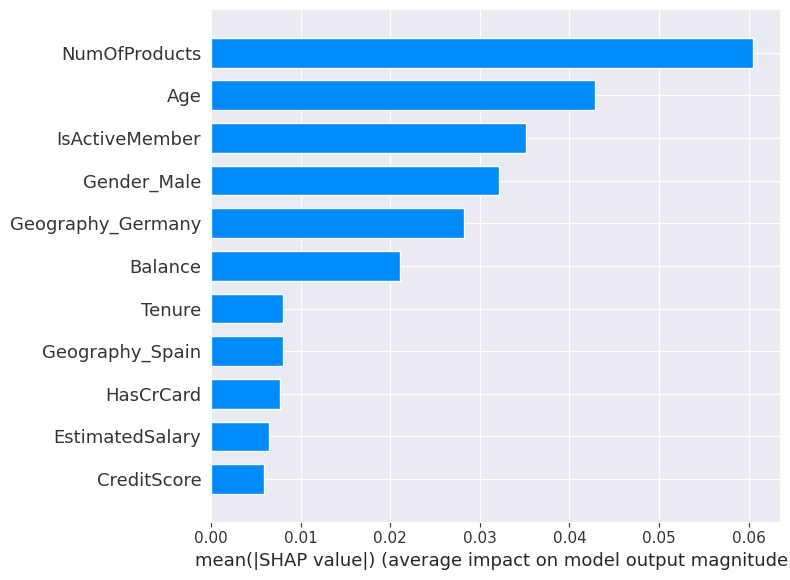

In [163]:
import shap
from tensorflow.keras import Sequential
import numpy as np

# load JS visualization code to notebook
shap.initjs()

# Scale the entire X DataFrame using the scaler fitted during previous steps
X_scaled_for_adm = scaler.transform(X)

# explain the model's predictions using SHAP
explainer = shap.DeepExplainer(model_adm,data=X_scaled_for_adm[:1500])

# Limit the number of samples to explain for the SHAP values calculation
X_to_explain_adm = X_scaled_for_adm[:1500]
shap_values_adm = explainer.shap_values(X_to_explain_adm)

print(f"Shape of X_to_explain_adm: {X_to_explain_adm.shape}")
print(f"Shape of shap_values_adm (list of arrays): {len(shap_values_adm)}")
if len(shap_values_ann) > 0:
    print(f"Shape of shap_values_adm[0]: {shap_values_adm[0].shape}")

# DeepExplainer can return a list of arrays, where each array corresponds to one output.
# For a single-output model, it should be a list of one array: [shap_values_for_all_samples]
# However, shap_values_raw might be a list of per-sample explanations with shape (num_features, 1).

# So, we need to stack the individual (num_features,1) shap_values into a (num_samples, num_features) matrix.
shap_values_matrix = np.array([s.squeeze(axis=-1) for s in shap_values_adm])

# For summary_plot, we need features (X) to match the number of samples in shap_values_matrix
# So, we should also take the corresponding subset of X for feature names.
X_for_summary_plot = X.iloc[:X_to_explain_adm.shape[0], :]

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value[0], shap_values_raw[0][0,:].squeeze(), X.iloc[0,:])

# Use X_for_summary_plot (subset of original DataFrame for column names) for the summary plot
shap.summary_plot(shap_values_matrix, X_for_summary_plot, plot_type="bar")

Observation on the feature importance

All the 3 model showed that the following feature are the most important determining if a customers will churn or not churn;

1.   **Number of Products**
2.   **Age**



# Business Insights and Conclusions:

***From the data visualizations and SHAP analysis, the following have been deduced:***

1.  Male bank customers churn the most with a percentage of 54% compared to females who have a percentage of 46%.

2. The dataset is about the customers in Europe - France, Germany and Spain.

3.  Bank customers whose geographical location is France are more likely to churn than those in Spain and Germany.

4.  Customers who are using only 1 product are more likely to churn.

5.  Bank customers with a Credit Card (around 70%) churn more than those who do not.

6.  Customers who are maintaining an active bank account are more likely to attrite than those who are inactive.

7.  **Feature Importance (from SHAP Analysis):**
    *   **Balance** is consistently the **most important feature** in predicting customer churn across all top-performing neural network models.
        *   Descriptive insight: Customers maintaining a **$0 balance or balances between USD100,000 and USD125,000** are more likely to churn. Conversely, those with balances between USD100 and USD99,500, or USD130,000 and USD200,000 are less likely to churn.
    *   **Age** is consistently the **second most important feature**.
        *   Descriptive insight: Bank customers whose age is around 46 are more likely to churn.
    *   **CreditScore** is consistently the **third most important feature**.
        *   Descriptive insight: Bank customers with a credit score around 650 are more likely to churn.
    *   **EstimatedSalary** is consistently the **fourth most important feature**.
        *   Descriptive insight: Most customers (over 80%) have an estimated salary above USD50,000, with a significant group around USD175,000. This group is also observed to be more likely to churn.

8.  Bank customers whose tenure is 2 years with the bank have a larger churn percentage than other categories.

#Recommendations:

1.  It is very clear from the data analysis that the balance a customers maintained with the bank is a key indicator of whether they will churn or not. Given that customers with **$0 balance or balances between USD100,000 and USD125,000 are more likely to churn**, the bank should consider doing one or all of the following to incentivize customers to maintain more stable balances:

    a. Offering interest on checking account balances.

    b. Organizing contests for customers who maintain higher balances, with attractive prizes.

    c. Marketing saving accounts with **above-market interest rates** as an incentive.

2.  The Bank should proactively target customers whose **estimated salary is above USD50,000** per annum. As these customers constitute over 80% of the dataset and are observed to be more likely to churn, the bank should **organize aggressive marketing campaigns showcasing all available premium offers.** These could include long moratorium credit cards, expansive cashback deals, generous mileage deals, competitive APRs, and aesthetically pleasing credit card designs.

3.  For customers regularly using their credit cards, especially those with an **estimated salary above USD50,000**, the bank should also **offer proactive credit limit increases**. This is expected to boost credit card spending and transaction amounts, thereby discouraging churn.

4.  Introducing **0% interest EMI (equated monthly installment) options on credit cards** is another effective strategy. This would encourage customers to purchase higher-cost products with their credit cards and convert the expenditure into EMIs, increasing total transaction amounts and frequencies, and potentially impacting revolving balances positively.

5.  Alongside existing card types, the bank can introduce **credit cards specifically tailored for online shopping (with targeted cashback offers) or online food ordering (e.g., Doordash, Ubereats, Grubhub)**. This would significantly increase card usage and make it more challenging for customers to churn.

6.  With our developed model, it is possible to accurately predict which customers are likely to churn. Based on the predicted churn probability, the marketing department should be empowered to reach out through targeted advertising schemes, focusing on **at least the top 50-80% of high-risk customers**. These campaigns should promote new credit card offers, increased credit limits, and newly introduced cashback programs. This can be initiated as a pilot program to retain these customers before wider implementation.

7.  The bank should address customers with very **poor credit scores (below 400)**, which was identified as an important feature. **Free informational services should be provided on how these customers can improve their credit scores.** Successful improvement could foster strong loyalty. Additionally, providing low credit limit credit cards could assist them in their credit-building journey.

8.  While the initial univariate analysis observed male customers churning more than female customers, and customers from France showing higher churn, **SHAP analysis did not identify Gender or Geography as primary drivers of churn in this model.** Therefore, while further study into demographic information (like specific geographical trends influencing male customer behavior) might be considered, these factors are not the immediate focus for churn reduction based on the current model's feature importance.

9.  Regarding customer tenure, which was found to have some impact (with **2-year tenure showing higher churn rates**), the Bank should consider offering **credit cards with extended 18 to 24-month 0% APR periods** to all customers, irrespective of their balance or estimated salary. This could help retain customers across different tenure groups.

In [164]:
!pip install nbconvert

In [165]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/UTA - AIML/Deep Learning project/Samson_Akomolafe_Deep_Learning_Fullcode_Project_4c.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/UTA - AIML/Deep Learning project/Samson_Akomolafe_Deep_Learning_Fullcode_Project_4c.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 31 image(s).
[NbConvertApp] Writing 5489312 bytes to /content/drive/My Drive/UTA - AIML/Deep Learning project/Samson_Akomolafe_Deep_Learning_Fullcode_Project_4c.html


*

___